In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ni
import scipy.misc as mi
from PIL import Image
from scipy import misc
import glob
import cv2
import os
import tensorflow as tf
from scipy.misc import toimage
import scipy

/home/kishore/Desktop/training set/Gable_217.png
(128, 128)
246


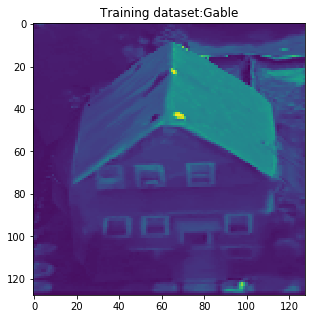

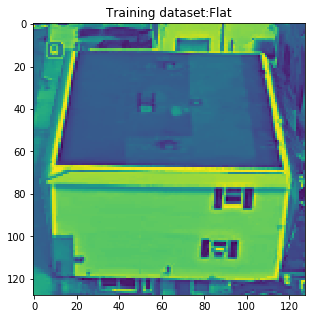

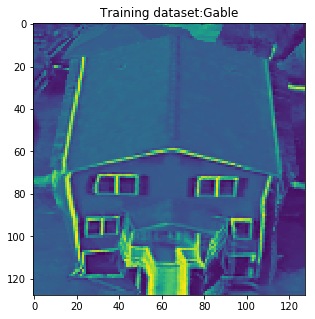

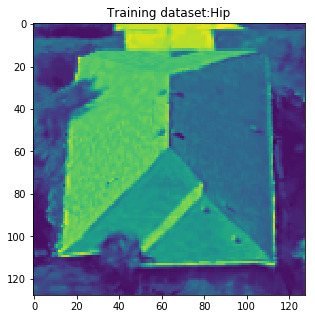

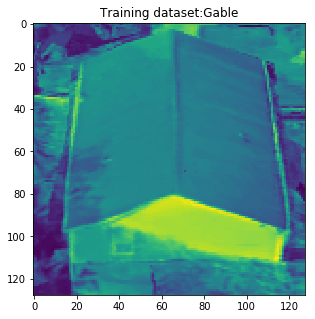

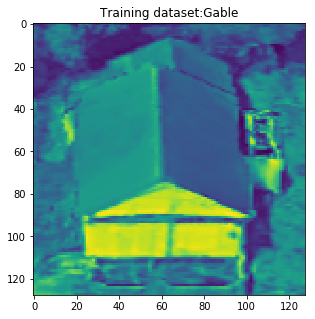

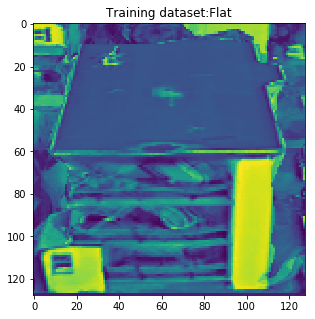

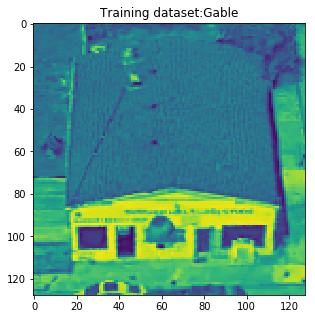

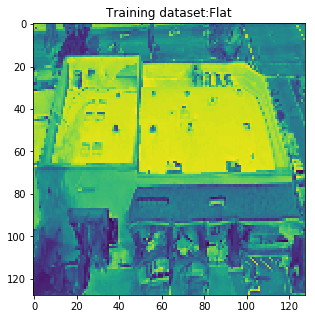

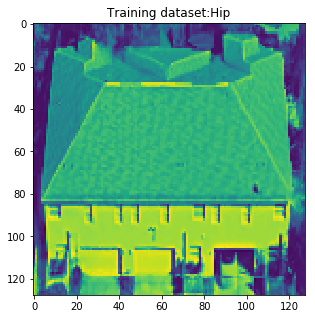

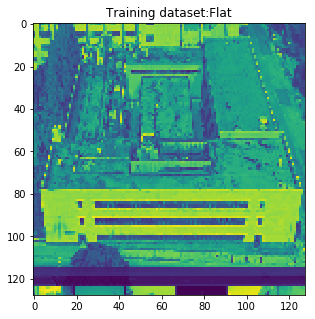

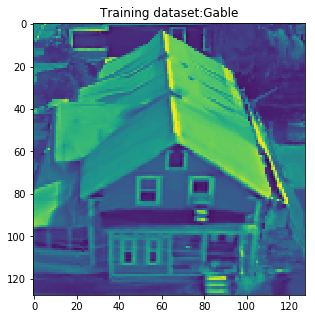

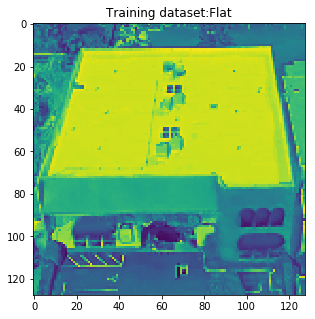

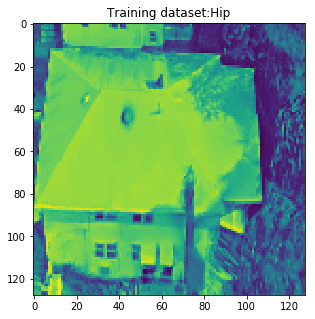

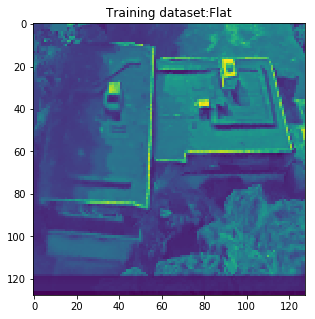

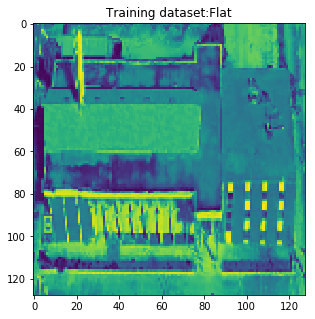

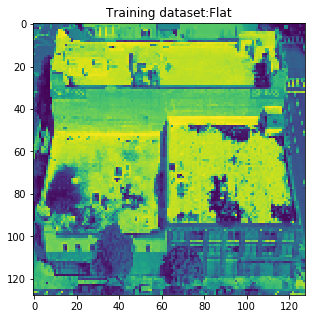

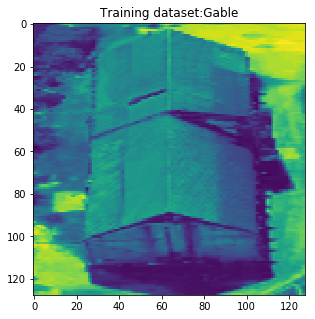

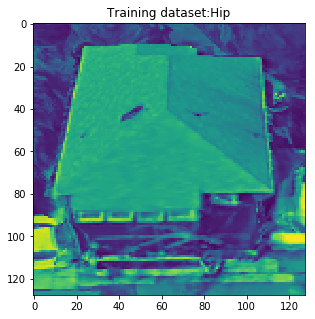

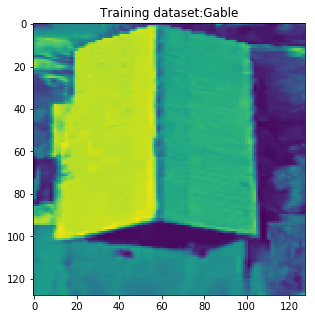

In [42]:
#Getting the training set - For regular deep nets 
train_dir='/home/kishore/Desktop/training set/' 
train_images=[]
train_labels=[]
act_labels=[]
for image_path in glob.glob(train_dir+"*.PNG"):
    os.rename(image_path,image_path.replace(".PNG",".png"))
for image_path in glob.glob(train_dir+"*.png"):
    if 'Flat' in image_path:
        #Images converted to 1*n structure
        train_images.append(cv2.resize(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2GRAY),(128,128)))
        train_labels.append(np.array([1,0,0,0]))
        act_labels.append('Flat')
    elif 'Gable' in image_path:
        train_images.append(cv2.resize(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2GRAY),(128,128)))
        train_labels.append(np.array([0,1,0,0]))
        act_labels.append('Gable')
    elif 'Hip' in image_path:
        train_images.append(cv2.resize(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2GRAY),(128,128)))
        train_labels.append(np.array([0,0,1,0]))
        act_labels.append('Hip')
    elif 'Gambrel' in image_path:
        train_images.append(cv2.resize(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2GRAY),(128,128)))
        train_labels.append(np.array([0,0,0,1]))
        act_labels.append('Gambrel')

print(image_path)
print(train_images[0].shape)
#plt.imshow(train_images[2])
print(len(train_labels))
train_images=np.array(train_images)
train_labels=np.array(train_labels)
#image = misc.imresize(misc.imread(image_path),(128,128))
#plt.imshow(image)

def plt_st(l1,l2):
    plt.figure(figsize=(l1,l2))


for i in range(0, 20):
    plt_st(5, 5)
    plt.imshow(train_images[i])
    plt.title("Training dataset:" +act_labels[i])
plt.show()

/home/kishore/Desktop/test set/Gable_220.png
(128, 128)
(63, 128, 128)
(63, 4)


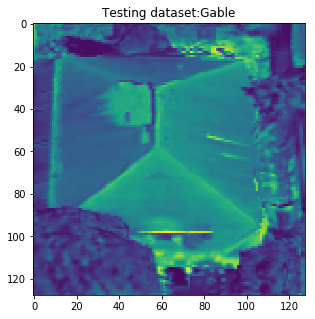

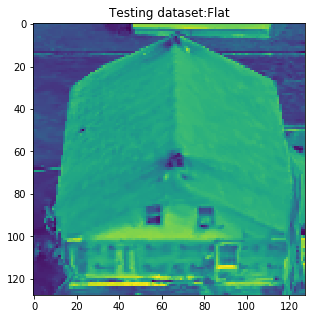

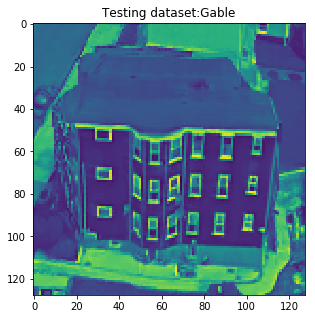

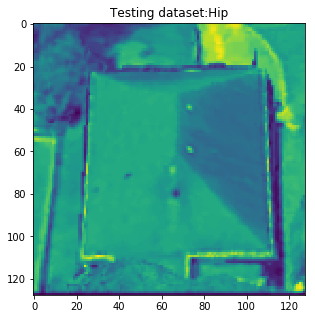

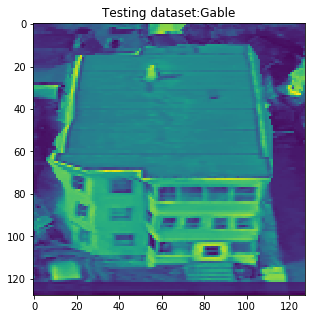

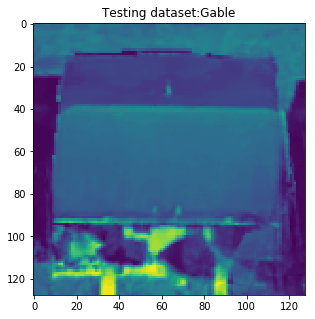

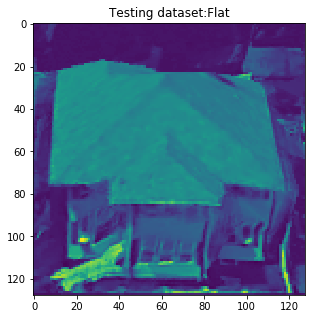

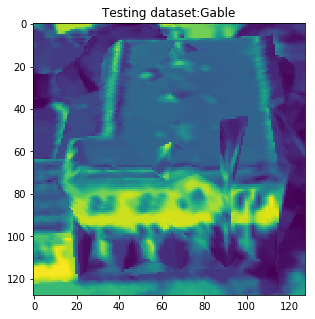

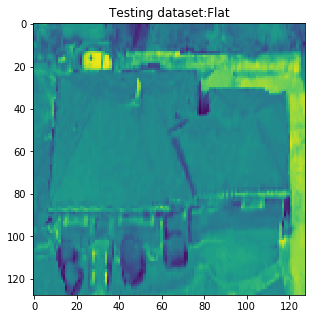

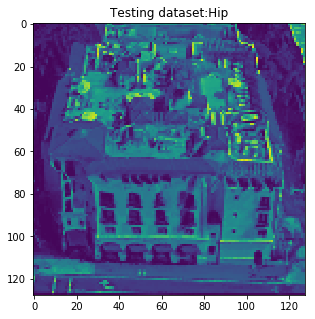

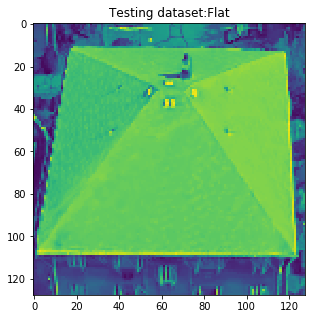

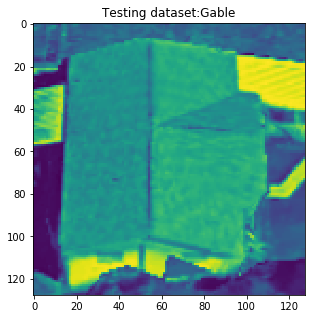

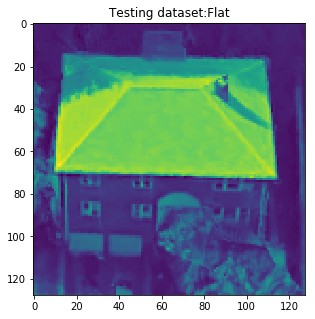

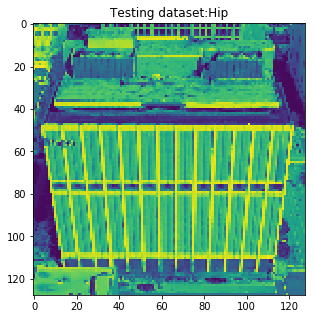

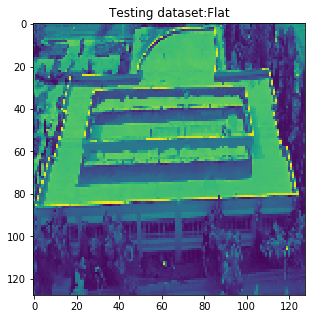

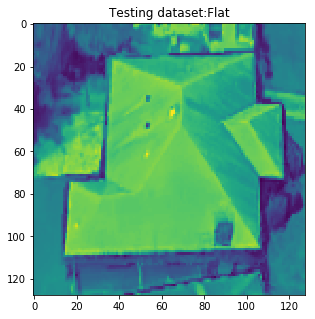

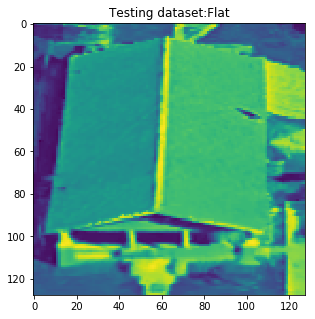

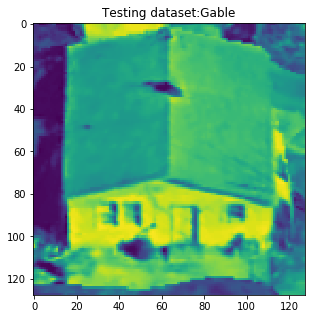

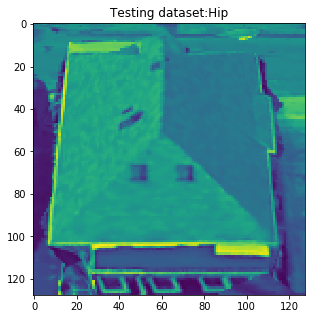

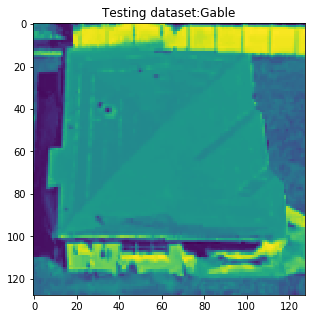

In [43]:
#Getting the test set - for regular deep nets 
test_dir='/home/kishore/Desktop/test set/'
test_images=[]
test_labels=[]
act_labels
for image_path in glob.glob(test_dir+"*.PNG"):
    os.rename(image_path,image_path.replace(".PNG",".png"))
for image_path in glob.glob(test_dir+"*.png"):
    if 'Flat' in image_path:
        #print(1)
        test_images.append(cv2.resize(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2GRAY),(128,128)))
        test_labels.append(np.array([1,0,0,0]))
        act_labels.append('Flat')
    elif 'Gable' in image_path:
        test_images.append(cv2.resize(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2GRAY),(128,128)))
        test_labels.append(np.array([0,1,0,0]))
        act_labels.append('Gable')
    elif 'Hip' in image_path:
        test_images.append(cv2.resize(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2GRAY),(128,128)))
        test_labels.append(np.array([0,0,1,0]))
        act_labels.append('Hip')
    elif 'Gambrel' in image_path:
        test_images.append(cv2.resize(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2GRAY),(128,128)))
        test_labels.append(np.array([0,0,0,1]))
        act_labels.append('Gambrel')

print(image_path)
print(test_images[0].shape)

test_images=np.array(test_images)
test_labels=np.array(test_labels)
#image = misc.imresize(misc.imread(image_path),(128,128))
#plt.imshow(image)
print(test_images.shape)
print(test_labels.shape)
def plt_st(l1,l2):
    plt.figure(figsize=(l1,l2))


for i in range(0, 20):
    plt_st(5, 5)
    plt.imshow(test_images[i])
    plt.title("Testing dataset:" +act_labels[i])
plt.show()

In [46]:
#Regular Deep nets Initialization
x=tf.placeholder(tf.float32,[None,16384])
y_=tf.placeholder(tf.float32,[None,4])

W=tf.Variable(tf.zeros([16384,4]))
b=tf.Variable(tf.zeros([4]))

#scipy.tensordot(x,W,axes=[1,1]).swapaxes(0,1)
y=tf.nn.softmax(tf.matmul(x,W)+b)
#y=tf.nn.softmax(scipy.tensordot(x,W,axes=[1,1]).swapaxes(0,1)+b)
cross_entropy= -tf.reduce_sum(y_*tf.log(y))

train_step=tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [47]:
#Regular Deep nets execution
#for j in range(0,len(train_images)):
#    train_images[j]=cv2.resize(train_images[j],(49152,1))
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

batchsize = 30
for i in range(1000):
    for j in range(0,len(train_images), batchsize):
        batch_xs,batch_ys=np.reshape(train_images[j:j+batchsize], (-1, 16384)),np.reshape(train_labels[j:j+batchsize], (-1, 4))
    sess.run(train_step,feed_dict={x: batch_xs,y_: batch_ys})

print(sess.run(accuracy,feed_dict={x:np.reshape(test_images, (-1, 16384)),y_:np.reshape(test_labels, (-1, 4))}))


Instructions for updating:
Use `tf.global_variables_initializer` instead.
0.349206
